In [12]:
import os
import numpy as np
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 72

# Testing HEALPix ERA5 Data

This notebook tests reading and visualizing HEALPix ERA5 data.

In [13]:
in_dir = '/pscratch/sd/w/wcmca1/hackathon/healpix/era5/'
# in_file = f'{in_dir}era5_3d_zoom8_20200101_20200102.zarr'

in_file = f'{in_dir}era5_3H_zoom8_20190101_20211231_v0.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

/pscratch/sd/w/wcmca1/hackathon/healpix/era5/era5_3H_zoom8_20190101_20211231_v0.zarr exists: True


In [14]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 3TB
Dimensions:  (time: 8768, cell: 786432, level: 15)
Coordinates:
  * level    (level) float64 120B 100.0 200.0 300.0 400.0 ... 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 70kB 2019-01-01 ... 2021-12-31T21:00:00
    crs      int64 8B 0
  * cell     (cell) int32 3MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Data variables: (12/17)
    d2m      (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    hfssd    (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    hur      (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
    hus      (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
    ie       (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    omega    (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
    ...       ...
    tas      (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    u10      (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    ua       (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
    v10      (time, cell) float32 28GB dask.array<chunksize=(8, 262144), meta=np.ndarray>
    va       (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
    zg       (time, cell, level) float32 414GB dask.array<chunksize=(8, 262144, 15), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      786432
    healpix_nside:     256
    healpix_order:     8
    original_grid:     latlon_1d
    remapping_method:  delaunay_triangulation

In [15]:
ds.time.isel(time=slice(0, 24))

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2019-01-01T00:00:00.000000000', '2019-01-01T03:00:00.000000000',
       '2019-01-01T06:00:00.000000000', '2019-01-01T09:00:00.000000000',
       '2019-01-01T12:00:00.000000000', '2019-01-01T15:00:00.000000000',
       '2019-01-01T18:00:00.000000000', '2019-01-01T21:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-02T03:00:00.000000000',
       '2019-01-02T06:00:00.000000000', '2019-01-02T09:00:00.000000000',
       '2019-01-02T12:00:00.000000000', '2019-01-02T15:00:00.000000000',
       '2019-01-02T18:00:00.000000000', '2019-01-02T21:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-03T03:00:00.000000000',
       '2019-01-03T06:00:00.000000000', '2019-01-03T09:00:00.000000000',
       '2019-01-03T12:00:00.000000000', '2019-01-03T15:00:00.000000000',
       '2019-01-03T18:00:00.000000000', '2019-01-03T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 192B 2019-01-01 ... 2019-01-03T21:00:00
    crs      int64 8B 0
Attributes:
    long_name:  time

In [16]:
ds.time[-10:]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2021-12-30T18:00:00.000000000', '2021-12-30T21:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2021-12-31T03:00:00.000000000',
       '2021-12-31T06:00:00.000000000', '2021-12-31T09:00:00.000000000',
       '2021-12-31T12:00:00.000000000', '2021-12-31T15:00:00.000000000',
       '2021-12-31T18:00:00.000000000', '2021-12-31T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2021-12-30T18:00:00 ... 2021-12-31T21:...
    crs      int64 8B 0
Attributes:
    long_name:  time

In [22]:
# ds.time[-10:]
level = ds.level.compute()
level

<xarray.DataArray 'level' (level: 15)> Size: 120B
array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  750.,  800.,  850.,
        900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 120B 100.0 200.0 300.0 400.0 ... 950.0 975.0 1e+03
    crs      int64 8B 0
Attributes:
    alternate_units:  millibar
    long_name:        pressure level
    short_name:       plev
    units:            hPa

In [18]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2019-01-01 00:00'

In [19]:
ds.hus.attrs

{'ecmwf_local_table': 128,
 'ecmwf_parameter': 133,
 'grid_specification': '0.25 degree x 0.25 degree from 90N to 90S and 0E to 359.75E (721 x 1440 Latitude/Longitude)',
 'long_name': 'Specific humidity',
 'maximum_value': 0.024465739727020264,
 'minimum_value': -1.0425165783090051e-05,
 'number_of_significant_digits': 7,
 'original_format': 'WMO GRIB 1 with ECMWF local table',
 'rda_dataset': 'ds633.0',
 'rda_dataset_doi': 'DOI: 10.5065/BH6N-5N20',
 'rda_dataset_group': 'ERA5 atmospheric pressure level analysis [netCDF4]',
 'rda_dataset_url': 'https:/rda.ucar.edu/datasets/ds633.0/',
 'short_name': 'q',
 'units': 'kg kg**-1'}

In [24]:
z_idx = np.argwhere(level.values == 850)[0]
z_idx
ds.hus.isel(level=z_idx)

<xarray.DataArray 'hus' (time: 8768, cell: 786432, level: 1)> Size: 28GB
dask.array<getitem, shape=(8768, 786432, 1), dtype=float32, chunksize=(8, 262144, 1), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float64 8B 850.0
  * time     (time) datetime64[ns] 70kB 2019-01-01 ... 2021-12-31T21:00:00
    crs      int64 8B 0
  * cell     (cell) int32 3MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Attributes: (12/14)
    ecmwf_local_table:             128
    ecmwf_parameter:               133
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    long_name:                     Specific humidity
    maximum_value:                 0.024465739727020264
    minimum_value:                 -1.0425165783090051e-05
    ...                            ...
    rda_dataset:                   ds633.0
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    short_name:                    q
    units:                         kg kg**-1

<Figure size 460.8x345.6 with 0 Axes>

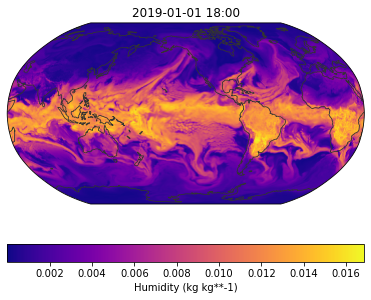

In [26]:
itime = 6
VAR = ds.hus.isel(time=itime, level=z_idx).squeeze()
im = egh.healpix_show(VAR, cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Humidity ({ds.hus.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

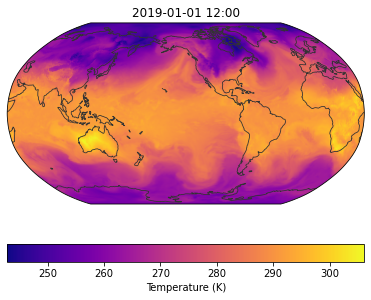

In [27]:
itime = 4
VAR = ds.ta.isel(time=itime, level=z_idx).squeeze()
im = egh.healpix_show(VAR.where(VAR > 0), cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Temperature ({ds.ta.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

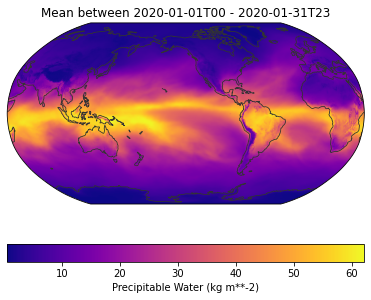

In [28]:
time_str1 = '2020-01-01T00'
time_str2 = '2020-01-31T23'
# time_str1 = '2019-08-10T00'
# time_str2 = '2019-08-11T23'
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

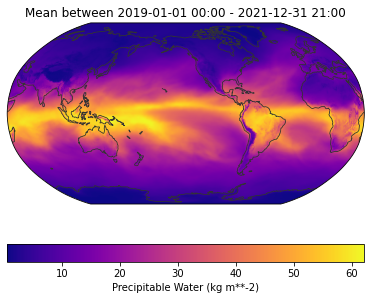

In [29]:
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')